# Data Misc
The GOSTrocks.dataMisc module provides simplified access to (usually) public datasets

In [1]:
import sys, os, urllib3
import rasterio

import pandas as pd
import geopandas as gpd

sys.path.insert(0, "../src")

import GOSTrocks.rasterMisc as rMisc
import GOSTrocks.dataMisc as dMisc
import GOSTrocks.mapMisc as mapMisc

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

%load_ext autoreload
%autoreload 2

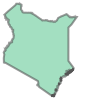

In [2]:
# Geobounadries is a great website for obtaining adiminstrative boundaries
adm1 = dMisc.get_geoboundaries("KEN", level='ADM1')
adm1.unary_union

In [3]:
# World cover from ESA is a global landcover dataset
worldcover_tiles = dMisc.get_worldcover(adm1, "C:/temp", print_command=False, verbose=True)
# This function downloads the tiles and creates a vrt file
worldcover_vrt = os.path.join("C:/temp", "WorldCover.vrt")
xx = rasterio.open(worldcover_vrt)
xx.bounds

BoundingBox(left=33.0, bottom=-6.0000000000000036, right=42.0, top=6.0)

<module 'matplotlib.pyplot' from 'c:\\wbg\\Anaconda3\\envs\\gostrocks\\Lib\\site-packages\\matplotlib\\pyplot.py'>

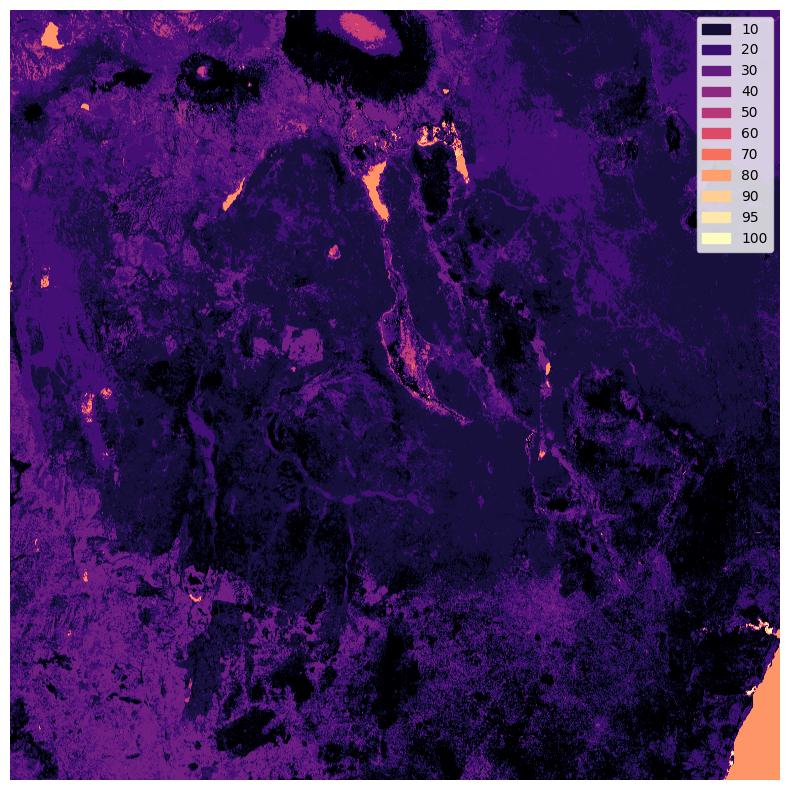

In [7]:
# Simple map of a single tile
temp = rasterio.open(worldcover_tiles[1])
mapMisc.static_map_raster(temp, thresh=[10,20,30,40,50,60,70,80,90,95,100])